In [1]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
app=pd.read_csv("C:\\Users\\Ayoub\\Downloads\\Projet HomeCredit\\Data\\01_app_merged_raw.csv")
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,prev_credit_AMT_BALANCE_mean,prev_AMT_ANNUITY_mean.1,prev_AMT_ANNUITY_max.1,prev_AMT_APPLICATION_mean.1,prev_AMT_APPLICATION_max.1,prev_AMT_CREDIT_mean.1,prev_AMT_CREDIT_max.1,prev_NAME_CONTRACT_TYPE.1,prev_pos_MONTHS_BALANCE_min_mean.1,prev_credit_AMT_BALANCE_mean.1
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,9251.775,9251.775,179055.00,179055.0,179055.00,179055.0,Consumer loans,-19.000000,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,56553.990,98356.995,435436.50,900000.0,484191.00,1035882.0,Consumer loans,-43.333333,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,5357.250,5357.250,24282.00,24282.0,20106.00,20106.0,Consumer loans,-27.000000,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,23651.175,39954.510,272203.26,688500.0,291695.50,906615.0,Cash loans,-12.000000,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,12278.805,22678.785,150530.25,247500.0,166638.75,284400.0,Cash loans,-42.200000,NaN


In [2]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 173 entries, SK_ID_CURR to prev_credit_AMT_BALANCE_mean.1
dtypes: float64(112), int64(41), object(20)
memory usage: 405.9+ MB


In [3]:
app.shape

(307511, 173)

On veut voir les colonnes dupliqués donc on fait :

In [5]:
duplicated_cols=[]#pour voir les colonnes duppliqué
duplicate_to_drop=[]#pour supprimer
cols=app.columns
for i in range (len(cols)):
    for j in range(i+1,len(cols)):
        if app[cols[i]].equals(app[cols[j]]):
            duplicated_cols.append((cols[i],cols[j]))
            duplicate_to_drop.append(cols[j])

print("Les colonnes dupliqués sont:")
for col1, col2 in duplicated_cols:
    print(f"{col1}<=> {col2}")




            

Les colonnes dupliqués sont:
bureau_AMT_CREDIT_SUM_mean<=> bureau_AMT_CREDIT_SUM_mean.1
bureau_AMT_CREDIT_SUM_sum<=> bureau_AMT_CREDIT_SUM_sum.1
bureau_AMT_ANNUITY_mean<=> bureau_AMT_ANNUITY_mean.1
bureau_DAYS_CREDIT_mean<=> bureau_DAYS_CREDIT_mean.1
bureau_DAYS_CREDIT_min<=> bureau_DAYS_CREDIT_min.1
bureau_CREDIT_DAY_OVERDUE_max<=> bureau_CREDIT_DAY_OVERDUE_max.1
bureau_SK_ID_BUREAU_count<=> bureau_SK_ID_BUREAU_count.1
bureau_bb_MONTHS_BALANCE_min_mean<=> bureau_bb_MONTHS_BALANCE_min_mean.1
bureau_bb_MONTHS_BALANCE_max_mean<=> bureau_bb_MONTHS_BALANCE_max_mean.1
bureau_bb_MONTHS_BALANCE_count_sum<=> bureau_bb_MONTHS_BALANCE_count_sum.1
bureau_bb_STATUS<=> bureau_bb_STATUS.1
prev_AMT_ANNUITY_mean<=> prev_AMT_ANNUITY_mean.1
prev_AMT_ANNUITY_max<=> prev_AMT_ANNUITY_max.1
prev_AMT_APPLICATION_mean<=> prev_AMT_APPLICATION_mean.1
prev_AMT_APPLICATION_max<=> prev_AMT_APPLICATION_max.1
prev_AMT_CREDIT_mean<=> prev_AMT_CREDIT_mean.1
prev_AMT_CREDIT_max<=> prev_AMT_CREDIT_max.1
prev_NAME_CONTRA

In [6]:

app.drop(columns=duplicate_to_drop, inplace=True)
print(f"Colonnes supprimées car dupliquées : {duplicate_to_drop}")


Colonnes supprimées car dupliquées : ['bureau_AMT_CREDIT_SUM_mean.1', 'bureau_AMT_CREDIT_SUM_sum.1', 'bureau_AMT_ANNUITY_mean.1', 'bureau_DAYS_CREDIT_mean.1', 'bureau_DAYS_CREDIT_min.1', 'bureau_CREDIT_DAY_OVERDUE_max.1', 'bureau_SK_ID_BUREAU_count.1', 'bureau_bb_MONTHS_BALANCE_min_mean.1', 'bureau_bb_MONTHS_BALANCE_max_mean.1', 'bureau_bb_MONTHS_BALANCE_count_sum.1', 'bureau_bb_STATUS.1', 'prev_AMT_ANNUITY_mean.1', 'prev_AMT_ANNUITY_max.1', 'prev_AMT_APPLICATION_mean.1', 'prev_AMT_APPLICATION_max.1', 'prev_AMT_CREDIT_mean.1', 'prev_AMT_CREDIT_max.1', 'prev_NAME_CONTRACT_TYPE.1', 'prev_pos_MONTHS_BALANCE_min_mean.1', 'prev_credit_AMT_BALANCE_mean.1']


La raison pour la quel jai fait ca ? Car je lavais fait sans et yavait beaucoup trop de colonne affiché dans le plot (ci-dessous) donc cetais beaucoup mieux de supprimer
les colonnes doublons maintenant

Maintenant, On veut voir si ya des colonnes qui ont seulement une valeur donc on fait:

In [9]:
constant_cols=[col for col in app.columns if app[col].nunique(dropna=False)==1]
print(f"\nLes Colonnes constantes sont  : {constant_cols}")




Les Colonnes constantes sont  : []


Maintenant on veut voir les colonnes vides 

In [11]:
empty_cols = [col for col in app.columns if app[col].isna().sum() == app.shape[0]]
print(f"\nLes Colonnes vides sont : {empty_cols}")



Les Colonnes vides sont : []


Analayse des Nan partielle:

In [13]:
# Calcul du pourcentage de valeurs manquantes par colonne
missing_ratio = app.isna().mean().sort_values(ascending=False)

#Affichage des colonnes ayant au moins 1% de valeurs manquantes
nan_col=missing_ratio[missing_ratio> 0.3]
print(f"\nColonnes avec >30% de valeurs manquantes :")
print(nan_col)






Colonnes avec >30% de valeurs manquantes :
prev_credit_AMT_BALANCE_mean         0.746565
bureau_AMT_ANNUITY_mean              0.739817
bureau_bb_MONTHS_BALANCE_max_mean    0.700073
bureau_bb_STATUS                     0.700073
bureau_bb_MONTHS_BALANCE_min_mean    0.700073
COMMONAREA_MODE                      0.698723
COMMONAREA_MEDI                      0.698723
COMMONAREA_AVG                       0.698723
NONLIVINGAPARTMENTS_MODE             0.694330
NONLIVINGAPARTMENTS_MEDI             0.694330
NONLIVINGAPARTMENTS_AVG              0.694330
FONDKAPREMONT_MODE                   0.683862
LIVINGAPARTMENTS_MEDI                0.683550
LIVINGAPARTMENTS_MODE                0.683550
LIVINGAPARTMENTS_AVG                 0.683550
FLOORSMIN_MODE                       0.678486
FLOORSMIN_MEDI                       0.678486
FLOORSMIN_AVG                        0.678486
YEARS_BUILD_MODE                     0.664978
YEARS_BUILD_AVG                      0.664978
YEARS_BUILD_MEDI                    

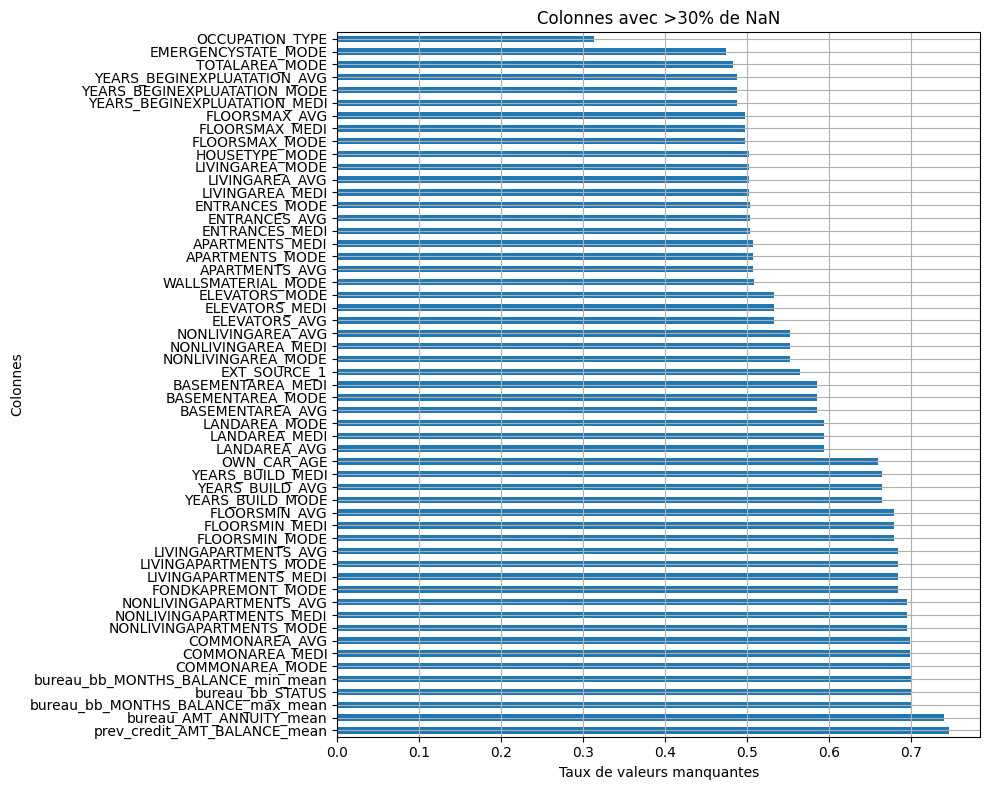

In [14]:

nan_col.plot(kind='barh', figsize=(10, 8), title='Colonnes avec >30% de NaN')
plt.xlabel("Taux de valeurs manquantes")
plt.ylabel("Colonnes")
plt.grid(True)
plt.tight_layout()
plt.show()

Maintenant, on va donc supprimer les colonnes ayant superieur strictement 30% de NAN, mais attention
a ne pas supprimer des colonnes importantes pour le modele !! Ce nest pasparcequ'une colonne a 30 % de NAN quelle doit etresupprimé!
On va meme faire un nettoyage en profondeur en enlevant les colonnes n'ayant que 5 pourcent de NAN, si tenté quelles soient inutile


In [16]:
col_missing_observation=missing_ratio[missing_ratio > 0.3]
print(col_missing_observation)
col_missing_observation.count()

prev_credit_AMT_BALANCE_mean         0.746565
bureau_AMT_ANNUITY_mean              0.739817
bureau_bb_MONTHS_BALANCE_max_mean    0.700073
bureau_bb_STATUS                     0.700073
bureau_bb_MONTHS_BALANCE_min_mean    0.700073
COMMONAREA_MODE                      0.698723
COMMONAREA_MEDI                      0.698723
COMMONAREA_AVG                       0.698723
NONLIVINGAPARTMENTS_MODE             0.694330
NONLIVINGAPARTMENTS_MEDI             0.694330
NONLIVINGAPARTMENTS_AVG              0.694330
FONDKAPREMONT_MODE                   0.683862
LIVINGAPARTMENTS_MEDI                0.683550
LIVINGAPARTMENTS_MODE                0.683550
LIVINGAPARTMENTS_AVG                 0.683550
FLOORSMIN_MODE                       0.678486
FLOORSMIN_MEDI                       0.678486
FLOORSMIN_AVG                        0.678486
YEARS_BUILD_MODE                     0.664978
YEARS_BUILD_AVG                      0.664978
YEARS_BUILD_MEDI                     0.664978
OWN_CAR_AGE                       

np.int64(55)

Une colonne est à supprimer si elle a un taux de NAN beaucoup trop élevé, si elle est ambigu, si elle est pas utile pour la prédiction exemple superficie
de l'appartement du client, ca pourrait nous aider mais cest beaucoup trop indirect pour savoir si un client va rembourser.
exemple: "bureau_bb_MONTHS_BALANCE_max_mean": La moyenne des "maximums" de mois enregistrés par crédit, regroupée par client.En clair ? Une métrique tres agrégée, très éloignée du sens original.



In [18]:
cols_to_drop = [
    "prev_credit_AMT_BALANCE_mean",
    "bureau_AMT_ANNUITY_mean",
    "bureau_bb_STATUS",
    "bureau_bb_MONTHS_BALANCE_max_mean",
    "bureau_bb_MONTHS_BALANCE_min_mean",
    "COMMONAREA_AVG", "COMMONAREA_MODE", "COMMONAREA_MEDI",
    "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAPARTMENTS_AVG",
    "FONDKAPREMONT_MODE",
    "LIVINGAPARTMENTS_MODE", "LIVINGAPARTMENTS_AVG", "LIVINGAPARTMENTS_MEDI",
    "FLOORSMIN_AVG", "FLOORSMIN_MODE", "FLOORSMIN_MEDI",
    "YEARS_BUILD_MODE", "YEARS_BUILD_MEDI", "YEARS_BUILD_AVG",
    "OWN_CAR_AGE",
    "LANDAREA_MODE", "LANDAREA_AVG", "LANDAREA_MEDI",
    "BASEMENTAREA_MEDI", "BASEMENTAREA_AVG", "BASEMENTAREA_MODE",
    "NONLIVINGAREA_AVG", "NONLIVINGAREA_MEDI", "NONLIVINGAREA_MODE",
    "ELEVATORS_MODE", "ELEVATORS_MEDI", "ELEVATORS_AVG",
    "WALLSMATERIAL_MODE",
    "APARTMENTS_MEDI", "APARTMENTS_AVG", "APARTMENTS_MODE",
    "ENTRANCES_MEDI", "ENTRANCES_AVG", "ENTRANCES_MODE",
    "LIVINGAREA_AVG", "LIVINGAREA_MODE", "LIVINGAREA_MEDI",
    "HOUSETYPE_MODE",
    "FLOORSMAX_MODE", "FLOORSMAX_AVG", "FLOORSMAX_MEDI",
    "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BEGINEXPLUATATION_MODE",
    "TOTALAREA_MODE","EMERGENCYSTATE_MODE"
]
cols_to_drop_valid = [col for col in cols_to_drop if col in app.columns]
app.drop(columns=cols_to_drop_valid, inplace=True)
print(f"{len(cols_to_drop)} colonnes supprimées car inutiles ou trop de NaN.")

cols_to_keep=["OCCUPATION_TYPE" , "EXT_SOURCE_1"]

53 colonnes supprimées car inutiles ou trop de NaN.


on fait la meme chose mais entre 1 pourcent et 30 de nan, je lai pas fait dun coup car yavait trop de colonne ca allait etre trop long et jallais me perdre.


In [20]:
col_missing_observationv2=missing_ratio[(missing_ratio >= 0.01) & (missing_ratio <= 0.3)]
print(col_missing_observationv2)


EXT_SOURCE_3                          0.198253
bureau_AMT_CREDIT_SUM_mean            0.143153
bureau_DAYS_CREDIT_min                0.143149
bureau_SK_ID_BUREAU_count             0.143149
bureau_bb_MONTHS_BALANCE_count_sum    0.143149
bureau_DAYS_CREDIT_mean               0.143149
bureau_AMT_CREDIT_SUM_sum             0.143149
bureau_CREDIT_DAY_OVERDUE_max         0.143149
AMT_REQ_CREDIT_BUREAU_HOUR            0.135016
AMT_REQ_CREDIT_BUREAU_WEEK            0.135016
AMT_REQ_CREDIT_BUREAU_QRT             0.135016
AMT_REQ_CREDIT_BUREAU_MON             0.135016
AMT_REQ_CREDIT_BUREAU_DAY             0.135016
AMT_REQ_CREDIT_BUREAU_YEAR            0.135016
prev_pos_MONTHS_BALANCE_min_mean      0.066807
prev_AMT_ANNUITY_max                  0.054863
prev_AMT_ANNUITY_mean                 0.054863
prev_AMT_CREDIT_max                   0.053507
prev_AMT_CREDIT_mean                  0.053507
prev_AMT_APPLICATION_max              0.053507
prev_NAME_CONTRACT_TYPE               0.053507
prev_AMT_APPL

Toutes les colonnes sont utiles.

In [22]:
cols_to_keep=[
    # Colonnes précédemment gardées (avec >30% de NaN mais importantes)
    "OCCUPATION_TYPE" , "EXT_SOURCE_1"

    # Colonnes entre 1% et 30% de NaN qu'on veut garder
    "EXT_SOURCE_3", "bureau_AMT_CREDIT_SUM_mean", "bureau_AMT_CREDIT_SUM_sum",
    "bureau_DAYS_CREDIT_min", "bureau_CREDIT_DAY_OVERDUE_max", "bureau_SK_ID_BUREAU_count",
    "bureau_bb_MONTHS_BALANCE_count_sum", "bureau_DAYS_CREDIT_mean",
    "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR",
    "prev_pos_MONTHS_BALANCE_min_mean", "prev_AMT_ANNUITY_mean", "prev_AMT_ANNUITY_max",
    "prev_AMT_APPLICATION_mean", "prev_AMT_APPLICATION_max", "prev_AMT_CREDIT_mean", "prev_AMT_CREDIT_max",
    "prev_NAME_CONTRACT_TYPE",
    "inst_PAYMENT_DELAY_max", "inst_PAYMENT_DELAY_mean", "inst_PAYMENT_DELAY_min",
    "inst_PAYMENT_DIFF_mean", "inst_PAYMENT_DIFF_max", "inst_PAYMENT_DIFF_min",
    "inst_AMT_PAYMENT_mean", "inst_AMT_PAYMENT_max", "inst_AMT_PAYMENT_min",
    "inst_AMT_INSTALMENT_sum", "inst_AMT_INSTALMENT_mean", "inst_AMT_INSTALMENT_max",
    "inst_NUM_INSTALMENT_NUMBER_count"
]

Maintenant quon a bien supprimé les colonnes inutile, on va imputer nos colonnes utiles.

In [24]:
for col in app.columns:
    if col in app.columns:
        if app[col].dtype == "object":
            app[col] = app[col].fillna("Unknown")
        else:
            app[col] = app[col].fillna(app[col].mean())


In [25]:
app.to_csv("02_app_cleaned.csv",index=False)

On peut passer a letape dapres,la correction des types.

In [27]:
app.shape

(307511, 100)

In [28]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 100 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   SK_ID_CURR                          307511 non-null  int64  
 1   TARGET                              307511 non-null  int64  
 2   NAME_CONTRACT_TYPE                  307511 non-null  object 
 3   CODE_GENDER                         307511 non-null  object 
 4   FLAG_OWN_CAR                        307511 non-null  object 
 5   FLAG_OWN_REALTY                     307511 non-null  object 
 6   CNT_CHILDREN                        307511 non-null  int64  
 7   AMT_INCOME_TOTAL                    307511 non-null  float64
 8   AMT_CREDIT                          307511 non-null  float64
 9   AMT_ANNUITY                         307511 non-null  float64
 10  AMT_GOODS_PRICE                     307511 non-null  float64
 11  NAME_TYPE_SUITE          

In [29]:
missing_summary = app.isna().sum()
missing_summary = missing_summary[missing_summary > 0]
print(missing_summary.sort_values(ascending=False))

Series([], dtype: int64)


On passe a letape 6: Ici pour des soucis d'optimisation mémoire, on va chercher a corriger les types objects en categorie
On va meme voir pour les colonnes qui contienne des 0 ou 1

In [31]:
object_cols=app.select_dtypes(include="object").columns
for col in object_cols:
    app[col]=app[col].astype("category")

 Maintenant on vérifier si certaines colonnes peuvent être des booléens
si une colonne ne contient que 0 et 1, on peut la convertir en booléen

In [33]:
for col in app.columns:
    if set(app[col].dropna().unique()) <= {0, 1}:#Meme si il n'y a plus de NA par prudence on met quand meme dropna
        app[col] = app[col].astype('bool')

In [34]:
app.dtypes.value_counts()

float64     46
bool        33
int64        8
category     2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [35]:
app.select_dtypes("category")

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,prev_NAME_CONTRACT_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,Consumer loans
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,Consumer loans
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,Consumer loans
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,Cash loans
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,Cash loans
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,Consumer loans
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,Unknown,MONDAY,XNA,Consumer loans
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,Consumer loans
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,Consumer loans


In [36]:
app.select_dtypes("bool")

,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,True,True,True,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307507,False,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307508,False,True,True,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307509,True,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


etape 7: On suit la checklist- la il faut nettoyer les noms de colonnes dans le data merging ona fait quelque chose de similaire, mais globalement cest 
tout cqui est  trait du milieu, / etc etc on voudra lemettre en tiret du bas 

In [38]:
app.columns= (app.columns
    .str.strip()             # on enlève les espaces au début/fin
    .str.replace(' ', '_')   # on remplace espaces internes par underscore
    .str.replace('-', '_')   # on remplace tirets par underscore
    .str.replace('/', '_')   # on remplace slashs par underscore
    .str.lower()             # on convertit les noms de colonnes en minuscule car c'est plus lisible 
)


In [39]:
print("Avant encodage :", app.shape)

Avant encodage : (307511, 100)


In [40]:
app_encoded = pd.get_dummies(app, drop_first=True)

In [41]:
print("Après encodage :", app_encoded.shape)

Après encodage : (307511, 205)


In [42]:
app_encoded.head()

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,...,organization_type_Transport: type 1,organization_type_Transport: type 2,organization_type_Transport: type 3,organization_type_Transport: type 4,organization_type_University,organization_type_XNA,prev_name_contract_type_Consumer loans,prev_name_contract_type_Revolving loans,prev_name_contract_type_Unknown,prev_name_contract_type_XNA
0,100002,True,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,False,False,False,False,False,False,True,False,False,False
1,100003,False,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,False,False,False,False,False,False,True,False,False,False
2,100004,False,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,False,False,False,False,False,True,False,False,False
3,100006,False,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,False,False,False,False,False,False,False,False,False
4,100007,False,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,False,False,False,False,False,False,False,False,False


In [43]:
app_encoded['target'] = app_encoded['target'].astype(int)
app_encoded.head()

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,...,organization_type_Transport: type 1,organization_type_Transport: type 2,organization_type_Transport: type 3,organization_type_Transport: type 4,organization_type_University,organization_type_XNA,prev_name_contract_type_Consumer loans,prev_name_contract_type_Revolving loans,prev_name_contract_type_Unknown,prev_name_contract_type_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,False,False,False,False,False,False,True,False,False,False
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,False,False,False,False,False,False,True,False,False,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,False,False,False,False,False,True,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,False,False,False,False,False,False,False,False,False


In [44]:
app_encoded['days_birth'] = app_encoded['days_birth'].abs()


In [45]:
app_encoded['days_employed']= app_encoded['days_employed'].replace(365243,0)

In [46]:
app_encoded['days_employed'] = app_encoded['days_employed'].abs()



In [84]:
app_encoded.head()


,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,...,organization_type_Transport: type 1,organization_type_Transport: type 2,organization_type_Transport: type 3,organization_type_Transport: type 4,organization_type_University,organization_type_XNA,prev_name_contract_type_Consumer loans,prev_name_contract_type_Revolving loans,prev_name_contract_type_Unknown,prev_name_contract_type_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,False,False,False,False,False,False,True,False,False,False
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,False,False,False,False,False,False,True,False,False,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,False,False,False,False,False,False,True,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,False,False,False,False,False,False,False,False,False,False


In [88]:
app_encoded.describe()

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,...,inst_payment_delay_mean,inst_payment_delay_min,inst_payment_delay_max,prev_amt_annuity_mean,prev_amt_annuity_max,prev_amt_application_mean,prev_amt_application_max,prev_amt_credit_mean,prev_amt_credit_max,prev_pos_months_balance_min_mean
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,1954.848123,...,-11.201740,-37.849075,16.231262,14532.052781,23722.738537,1.540055e+05,3.745905e+05,1.700700e+05,4.138656e+05,-34.773587
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.692794e+05,0.013831,4363.988632,2307.068896,...,12.805552,28.211735,108.190543,9729.089647,18636.224952,1.491305e+05,4.105500e+05,1.612422e+05,4.451293e+05,18.657653
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,-295.000000,-3189.000000,-156.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-96.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,289.000000,...,-14.425926,-42.000000,-2.000000,8055.669375,10788.502500,6.408169e+04,1.032368e+05,6.915600e+04,1.096132e+05,-46.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,1213.000000,...,-10.000000,-32.000000,2.000000,12550.455000,19167.975000,1.125000e+05,2.250000e+05,1.250168e+05,2.472750e+05,-34.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,2760.000000,...,-6.055556,-23.000000,12.000000,17828.556750,30267.585000,1.832186e+05,4.500000e+05,2.074446e+05,5.288175e+05,-20.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,17912.000000,...,1884.204545,42.000000,2884.000000,300425.445000,418058.145000,4.050000e+06,5.850000e+06,4.050000e+06,4.509688e+06,-1.000000


etape 8: sauvegarde

In [90]:
app_encoded.to_csv("03_app_encoded.csv", index=False)
